In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# ! unzip "/content/drive/MyDrive/colab/nus/5004 PLP/nmsm/Data_Sets.zip" -d "/content/drive/MyDrive/colab/nus/5004 PLP/nmsm/datasets"

# **NMSM Day 1 Part I**
## **In this section, we will take a look at several common sentiment analysis methods, namely Afinn, TextBlob, SentiWordNet, VADER and Stanza.**

## **1. Using Afinn** - Afinn is the simple lexicon-based sentiment analysis approach developed by Finn Årup Nielsen  to be used for sentiment analysis . It contains 3300+ words with a polarity score associated with each word. One interesting aspect of this library package is that it contains the sentiment scores of different languages (e.g. Danish; language='da', Swedish; language='sv' and Turkish; language='tr').

In [ ]:
!pip install afinn

In [4]:
from afinn import Afinn
afn = Afinn()

In [11]:
afn_score = afn.score('I do not like Amazon')
afn_score

2.0

In [12]:
def afinn_sentiment_score(text_str):
  """
  Desc: Sentiment score based on afinn lib

  Arg:
    text_str (String) - single string value

  Return:
    (Sting) - "Positive" if score > 0,
              "Negative" if score < 0, 
              else "Neutral"
  """
  afn_score = afn.score(text_str)
  if (afn_score > 0):
    return 'Positive'
  elif (afn_score < 0):
    return 'Negative'
  else:
    return 'Neutral'

In [13]:
afinn_sentiment_score('I am :)')

'Neutral'

In [14]:
afinn_sentiment_score('Your service has never been good')

'Positive'

In [15]:
afinn_sentiment_score('Your service has never been better')

'Positive'

In [16]:
afinn_sentiment_score('I HATE FLOWERS')

'Negative'

In [17]:
afinn_sentiment_score('The product was not bad')

'Negative'

## **2. Using TextBlob** - TextBlob is a python library for Natural Language Processing (NLP) that uses Natural Language ToolKit (NLTK) to perform sentiment analysis tasks and supports complex analysis and operations on textual data. 

## It returns the polarity and subjectivity scores of a sentence (See NMSM Day 1 Part I Slide 16-17). Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora

In [19]:
from textblob import TextBlob

To do any kind of text processing using TextBlob, we need to follow two steps listed below:
*   Convert any string to TextBlob object.  [TextBlobs Are Like Python Strings!](https://textblob.readthedocs.io/en/dev/quickstart.html#textblobs-are-like-python-strings)
*   Call functions of TextBlob to do a specific task

In [22]:
blob_obj = TextBlob('I do not like Amazon')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.0, subjectivity=0.0)

In [23]:
blob_obj = TextBlob('I am :)')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.5, subjectivity=1.0)

In [24]:
blob_obj = TextBlob('The product was not bad')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [25]:
blob_obj = TextBlob('I hate flowers')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=-0.8, subjectivity=0.9)

In [26]:
blob_obj = TextBlob('Your service has never been good')
blob_score = blob_obj.sentiment
blob_score

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [27]:
# Only polarity score
polarity_score = TextBlob('Your service has never been good').polarity
polarity_score

0.7

In [28]:
# Only subjectivity score
subjectivity_score = TextBlob('Your service has never been good').subjectivity
subjectivity_score

0.6000000000000001

## **3. Using SentiWordNet** - SentiWordNet operates on the WordNet database, which is a lexical database composing English words, grouped as synonyms into what is known as synsets. Simply-speaking, WordNet is somewhat similar to a Thesaurus with the ability to understand certain specific contexts. SentiWordNet assigns to each synset of WordNet three sentiment scores: positivity, negativity, objectivity. It is different from both sentiment classification where we view positive and negative sentiments on a continuous scale. 

In [ ]:
!pip install -U nltk
import nltk
nltk.download('all') # Use this for everything. Then next 2 lines are not required
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

In [30]:
# Check words similar meaning words and different usage as per language 
list(swn.senti_synsets('hate'))

[SentiSynset('hate.n.01'), SentiSynset('hate.v.01')]

Here `hate` can be `Noun` -> **She looked at him with eyes full of hate** \
or `hate` cab be a `Verb` -> **I hate the smell of cigarettes**

In [31]:
from nltk.tag import pos_tag
token = nltk.word_tokenize('She looked at him with eyes full of hate')
after_tagging = nltk.pos_tag(token)
after_tagging

[('She', 'PRP'),
 ('looked', 'VBD'),
 ('at', 'IN'),
 ('him', 'PRP'),
 ('with', 'IN'),
 ('eyes', 'NNS'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('hate', 'NN')]

**She said its not good to `hate` some one** - This can be classified as 'neg'

In [32]:
token = nltk.word_tokenize('I hate the smell of cigarettes')
after_tagging = nltk.pos_tag(token)
after_tagging

[('I', 'PRP'),
 ('hate', 'VBP'),
 ('the', 'DT'),
 ('smell', 'NN'),
 ('of', 'IN'),
 ('cigarettes', 'NNS')]

In [ ]:
polarity_words= swn.senti_synsets('hate')
words = list(polarity_words)

for word in words:
  print(f'Type: {word},\n\
  Postive score: {word.pos_score()},\n\
  Negative score: {word.neg_score()},\n\
  Objectivity score: {word.obj_score()}', '\n')

Type: <hate.n.01: PosScore=0.125 NegScore=0.375>,
  Postive score: 0.125,
  Negative score: 0.375,
  Objectivity score: 0.5 

Type: <hate.v.01: PosScore=0.0 NegScore=0.75>,
  Postive score: 0.0,
  Negative score: 0.75,
  Objectivity score: 0.25 



The Sentiment of the sentence as a whole is determined by obtaining the difference between the postive and negative scores of the contextual tokens/words that use SentiWordNet to calculate the polarity.

https://nlpforhackers.io/sentiment-analysis-intro/

## **4. Using VADER** - VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis method that is specifically attuned to sentiments expressed in social media. By relying on a dictionary that maps lexical features to sentiment scores, VADER produces four sentiment measurements. The initial three, positive ("pos"), neutral ("neu"), and negative ("neg"), address the extent of the content that falls into those classifications. The last measurement, the "compound" score, is somewhat like an overall score, which have been normalized to run between – 1 and 1.

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Make sure you are set to handle UTF-8 encoding in your terminal or IDE***

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
vader_obj = SentimentIntensityAnalyzer()

In [ ]:
vader_obj.polarity_scores('I do not like Amazon')

{'compound': -0.3875, 'neg': 0.547, 'neu': 0.453, 'pos': 0.0}

[Read about scoring](https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples)


[How compound score is calculated](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk)

In [ ]:
vader_obj.polarity_scores('I am :)')

{'compound': 0.4588, 'neg': 0.0, 'neu': 0.4, 'pos': 0.6}

In [ ]:
vader_obj.polarity_scores('Your service has never been good')

{'compound': -0.3412, 'neg': 0.325, 'neu': 0.675, 'pos': 0.0}

In [ ]:
vader_obj.polarity_scores('I hate flowers')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [ ]:
vader_obj.polarity_scores('The product was not bad')

{'compound': 0.431, 'neg': 0.0, 'neu': 0.584, 'pos': 0.416}

In [ ]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

In [ ]:
for sentence in sentences:
  vader_score = vader_obj.polarity_scores(sentence)
  print(f'{sentence} {"-"*20} {vader_score}')

VADER is smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny! -------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny. -------------------- {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY. -------------------- {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!! -------------------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny. -------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good. -------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
At least it isn't a horr

## **5. Using Stanza** - Stanza is a Python NLP package that can be used in a pipeline to convert a string containing human language text into lists of sentences and words, to generate base forms of those words and their parts of speech and morphological features, to give a syntactic structure dependency parse, and to recognize named entities. It is built with neural network components that enable model training and evaluation with user-annotated data, and has functionalities such as constituency parsing, coreference resolution, and linguistic pattern matching.

In [ ]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 5.3 MB/s 
     |████████████████████████████████| 197 kB 54.5 MB/s 
     |████████████████████████████████| 4.7 MB 40.5 MB/s 
     |████████████████████████████████| 6.6 MB 37.9 MB/s 
     |████████████████████████████████| 596 kB 45.4 MB/s 
     |████████████████████████████████| 101 kB 11.4 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=6bf7db47e612c4302f5d6b5b87162e6d80fee55393bf2708a702c3bdc4e975ac
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import stanza
stanza.download('en') # loaded the 
nlp = stanza.Pipeline('en')

2022-07-29 05:54:36 INFO: Downloading default packages for language: en (English)...


2022-07-29 05:54:48 INFO: Finished downloading models and saved to /root/stanza_resources.


2022-07-29 05:54:49 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-07-29 05:54:49 INFO: Use device: cpu
2022-07-29 05:54:49 INFO: Loading: tokenize
2022-07-29 05:54:49 INFO: Loading: pos
2022-07-29 05:54:50 INFO: Loading: lemma
2022-07-29 05:54:50 INFO: Loading: depparse
2022-07-29 05:54:50 INFO: Loading: sentiment
2022-07-29 05:54:50 INFO: Loading: constituency
2022-07-29 05:54:51 INFO: Loading: ner
2022-07-29 05:54:52 INFO: Done loading processors!


In [ ]:
doc = nlp('I do not like Amazon. I am :). Your service has never been good. I hate flowers. The product was not bad')

In [ ]:
print(f'No of sentences: {len(doc.sentences)}', '\n')
print(f'No of tokens: {doc.num_tokens}', '\n')
print(f'No of words: {doc.num_words}', '\n')
print(f'No of entities: {len(doc.entities)}', '\n')
print(*[f'Sentence: {sentence}\n' for sentence in doc.sentences])

No of sentences: 5 

No of tokens: 26 

No of words: 26 

No of entities: 1 

Sentence: [
  {
    "id": 1,
    "text": "I",
    "lemma": "I",
    "upos": "PRON",
    "xpos": "PRP",
    "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
    "head": 4,
    "deprel": "nsubj",
    "start_char": 0,
    "end_char": 1,
    "ner": "O",
    "multi_ner": [
      "O"
    ]
  },
  {
    "id": 2,
    "text": "do",
    "lemma": "do",
    "upos": "AUX",
    "xpos": "VBP",
    "feats": "Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin",
    "head": 4,
    "deprel": "aux",
    "start_char": 2,
    "end_char": 4,
    "ner": "O",
    "multi_ner": [
      "O"
    ]
  },
  {
    "id": 3,
    "text": "not",
    "lemma": "not",
    "upos": "PART",
    "xpos": "RB",
    "head": 4,
    "deprel": "advmod",
    "start_char": 5,
    "end_char": 8,
    "ner": "O",
    "multi_ner": [
      "O"
    ]
  },
  {
    "id": 4,
    "text": "like",
    "lemma": "like",
    "upos": "VERB",
    "xpos": "VB",
    "fe

In [ ]:
print(f'First sentence : {doc.sentences[0].text}', '\n')
print(f'No of tokens: {len(doc.sentences[0].tokens)}', '\n')
print(f'No of words: {len(doc.sentences[0].words)}', '\n')
print(f'No of entities: {len(doc.sentences[0].entities)}', '\n')

First sentence : I do not like Amazon. 

No of tokens: 6 

No of words: 6 

No of entities: 1 



In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')
doc = nlp('I do not like Amazon. I am :). Your service has never been good. I hate flowers. The product was not bad')
sentiment_dict = {0: "Negative",
                  1: "Neutral",
                  2: "Positive"}
for i, sentence in enumerate(doc.sentences):
    print(i, sentence.text, '-'*10 , sentiment_dict[sentence.sentiment])

2022-07-29 05:54:55 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-07-29 05:54:55 INFO: Use device: cpu
2022-07-29 05:54:55 INFO: Loading: tokenize
2022-07-29 05:54:55 INFO: Loading: sentiment
2022-07-29 05:54:55 INFO: Done loading processors!


0 I do not like Amazon. ---------- Neutral
1 I am :). ---------- Neutral
2 Your service has never been good. ---------- Negative
3 I hate flowers. ---------- Negative
4 The product was not bad ---------- Negative


# **Text Pre-Processing and Data Visualization**


## In this section, we will be using an airline tweets dataset to demonstrate the various steps of text pre-processing and data visualization of social media data. To do so, we will use both NLTK and scikit-learn library.

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data_Sets')

In [ ]:
tweets_raw = pd.read_csv('Tweets.csv')
tweets_raw.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweets_data = tweets_raw[['text', 'airline_sentiment']]
tweets_data.head(2)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive


In [ ]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
tweets_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
tweets_data = tweets_data[tweets_data['airline_sentiment'] != 'neutral']
tweets_data['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

#### Data Visualization before Text Pre-processing

In [ ]:
# Cufflinks is a very useful add-on to plot figures directly from the dataframe series object
!pip install cufflinks

import cufflinks as cf

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
configure_plotly_browser_state()
tweets_raw['airline_sentiment'].iplot(kind='hist', bins=20, xTitle='polarity', linecolor='black', yTitle='count', title='Sentiment Polarity Distribution')

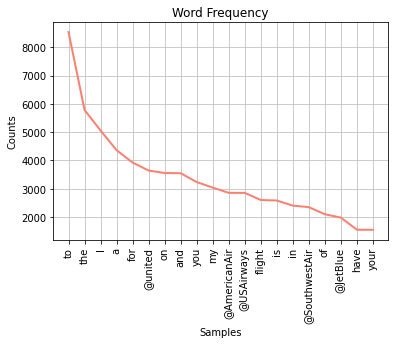

In [ ]:
# Nltk word frequency
all_words=[]        
for i in range(len(tweets_raw['text'])):
    all_words += tweets_raw['text'][i].split()

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

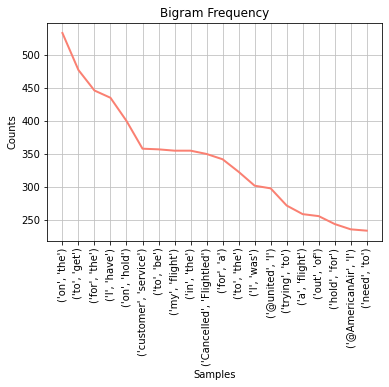

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [ ]:
import nltk
from nltk.collocations import *
bigram= nltk.collocations.BigramAssocMeasures()
Collocation = BigramCollocationFinder.from_words(all_words)
Collocation.nbest(bigram.pmi, 10)

[('"#flt', '755'),
 ('".', 'Dunno?!'),
 ('"Active', 'Military"'),
 ('"Airserv"', 'contractors'),
 ('"Best', 'Fare'),
 ('"Breaking', 'Barriers'),
 ('"Cabin', 'Functionality"'),
 ('"Considering?"', '#Accessibility'),
 ('"Customer', 'Experience"'),
 ('"Dear', 'Ted.')]

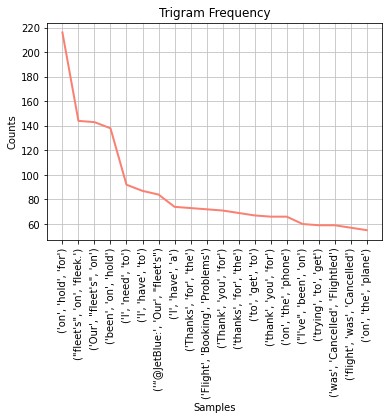

In [ ]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

In [ ]:
import nltk
from nltk.collocations import *
trigram= nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_words)
finder.nbest(trigram.pmi, 10)

[('"Best', 'Fare', 'Finder"'),
 ('"Customer', 'Experience"', 'executive.'),
 ('"No"', '"Y', 'not"'),
 ('"United', 'Breaks', 'Guitars"'),
 ('"Y', 'not"', '"bc'),
 ('"booked', '"#flt', '755'),
 ('"flyers', "right's", 'booklet"'),
 ('"white', 'revive"', 'laundry'),
 ('"{{header.elevateUser.numOfPointsAvailable', '||', "'0'"),
 ('#1623', 'sjo-iad.', 'Handed')]

In [ ]:
# Word cloud
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
wordcloud_before = WordCloud().generate(' '.join(tweets_raw['text']))

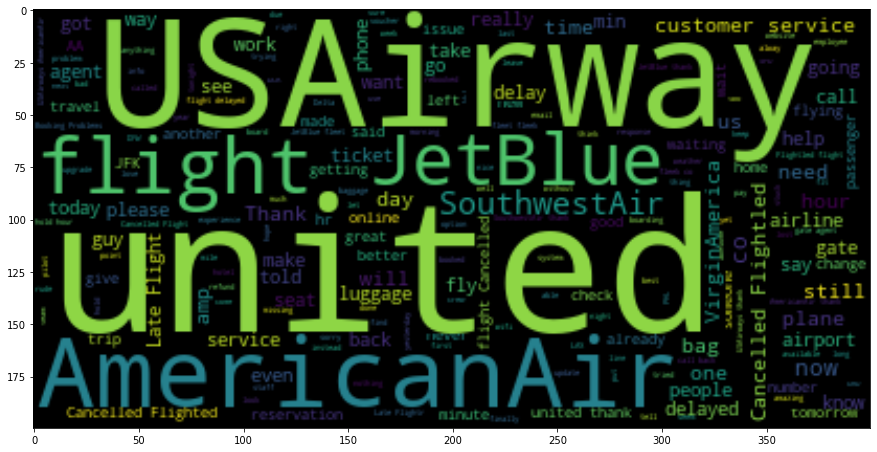

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')

#### Text Pre-processing

In [ ]:
tweets_data.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
tweets_data.reset_index(inplace=True, drop=True)
tweets_data.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
## Data cleaning starts here

# Lower case all
tweets_data['text_lower'] = tweets_data['text'].str.lower()
print(f"Before ---- {tweets_data['text'].iloc[0]}\nAfter ---- {tweets_data['text_lower'].iloc[0]}")

Before ---- @VirginAmerica plus you've added commercials to the experience... tacky.
After ---- @virginamerica plus you've added commercials to the experience... tacky.


In [ ]:
# Remove Punctuation
import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

tweets_data["text_wo_punct"] = tweets_data["text_lower"].apply(lambda text: remove_punctuation(text))

print(f"Before ---- {tweets_data['text_lower'].iloc[0]}\nAfter ---- {tweets_data['text_wo_punct'].iloc[0]}") 

Before ---- @virginamerica plus you've added commercials to the experience... tacky.
After ---- virginamerica plus youve added commercials to the experience tacky


In [ ]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweets_data["text_wo_stop"] = tweets_data["text_wo_punct"].apply(lambda text: remove_stopwords(text))

print(f"Before ---- {tweets_data['text_wo_punct'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stop'].iloc[0]}")

Before ---- virginamerica plus youve added commercials to the experience tacky
After ---- virginamerica plus youve added commercials experience tacky


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Remove numbers or any other no Alphabet
## my_string.isalpha(), my_string.isdigit(), my_string.isalnum()

def remove_digits(text):
    return " ".join([word for word in text.split() if not word.isdigit()])

tweets_data["text_wo_digits"] = tweets_data["text_wo_stop"].apply(lambda text: remove_digits(text))

print(f"Before ---- {tweets_data['text_wo_stop'].iloc[0]}\nAfter ---- {tweets_data['text_wo_digits'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [ ]:
# Check most frequent words 
from collections import Counter

cnt = Counter()

for text in tweets_data["text_wo_digits"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('united', 3390),
 ('flight', 3271),
 ('usairways', 2641),
 ('americanair', 2443),
 ('southwestair', 1778),
 ('jetblue', 1610),
 ('get', 1096),
 ('cancelled', 958),
 ('thanks', 917),
 ('service', 899)]

In [ ]:
# Remove most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweets_data["text_wo_stopfreq"] = tweets_data["text_wo_digits"].apply(lambda text: remove_freqwords(text))

print(f"Before ---- {tweets_data['text_wo_digits'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stopfreq'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [ ]:
# Check least frequent words 
from collections import Counter

cnt = Counter()

for text in tweets_data["text_wo_stopfreq"].values:
    for word in text.split():
        cnt[word] += 1
        
list(reversed(cnt.most_common(10)))

[('thank', 532),
 ('amp', 550),
 ('plane', 565),
 ('us', 570),
 ('im', 610),
 ('hold', 614),
 ('hours', 651),
 ('time', 677),
 ('help', 692),
 ('customer', 717)]

In [ ]:
# Remove rare words
RAREWORDS = set([w for (w, wc) in reversed(cnt.most_common(10))])

def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

tweets_data["text_wo_stopfreqrare"] = tweets_data["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))

print(f"Before ---- {tweets_data['text_wo_stopfreq'].iloc[0]}\nAfter ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercials experience tacky


In [ ]:
# Stemming (Try using for on sentiment task else the work may not retain its base meaning)
from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweets_data["text_stemmed"] = tweets_data["text_wo_stopfreqrare"].apply(lambda text: stem_words(text))

print(f"Before ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}\nAfter ---- {tweets_data['text_stemmed'].iloc[0]}")

Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plu youv ad commerci experi tacki


In [ ]:
# Lemmatizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweets_data["text_lemmatized"] = tweets_data["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))

print(f"Before ---- {tweets_data['text_wo_stopfreqrare'].iloc[0]}\nAfter ---- {tweets_data['text_lemmatized'].iloc[0]}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Before ---- virginamerica plus youve added commercials experience tacky
After ---- virginamerica plus youve added commercial experience tacky


In [ ]:
tweets_cleaned = tweets_data[['text_lemmatized', 'airline_sentiment']]
tweets_cleaned.columns = ['text', 'sentiments']
tweets_cleaned.reset_index(inplace=True)

#### Data Visualization after Text Pre-processing

In [ ]:
# Cufflinks is a very useful add-on to plot figures directly from the dataframe series object
# !pip install cufflinks
import cufflinks as cf

cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
tweets_cleaned['sentiments'].iplot(kind='hist', bins=20, xTitle='polarity', linecolor='black', yTitle='count', title='Sentiment Polarity Distribution')

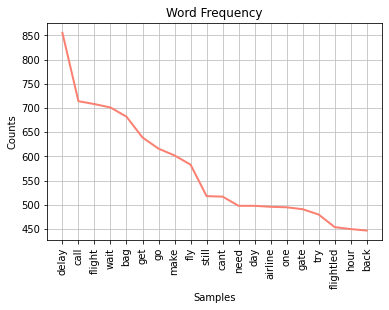

In [ ]:
# Nltk word frequency
all_words=[]        
for i in range(len(tweets_cleaned['text'])):
    all_words += tweets_cleaned['text'][i].split()

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

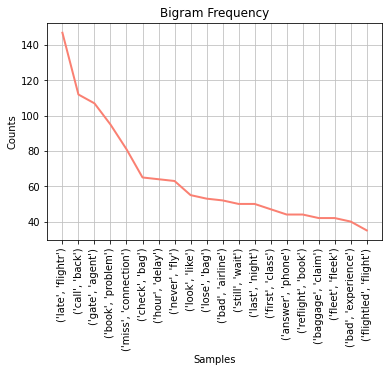

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [ ]:
import nltk
from nltk.collocations import *
bigram= nltk.collocations.BigramAssocMeasures()
Collocation = BigramCollocationFinder.from_words(all_words)
Collocation.nbest(bigram.pmi, 10)

[('1007p', 'smoothoperation'),
 ('1045pm', 'joanne'),
 ('11a', '1130a'),
 ('1213ewrlax', 'ua1151'),
 ('12th', 'februaryi'),
 ('14hrs', 'traveling'),
 ('15hr', 'wbroken'),
 ('1stclass', 'wnonworking'),
 ('20years', 'eventprof'),
 ('21feb15', 'dcarsw')]

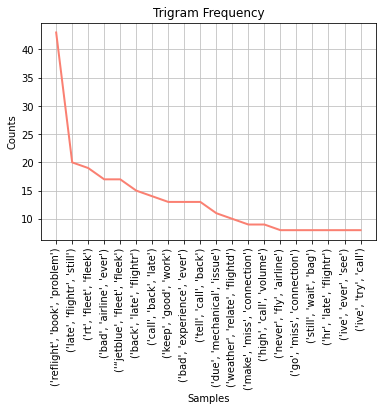

In [ ]:
#Trigrams
trigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency')

In [ ]:
import nltk
from nltk.collocations import *
trigram= nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_words)
finder.nbest(trigram.pmi, 10)

[('1213ewrlax', 'ua1151', 'seatarmrest'),
 ('15hr', 'wbroken', 'dreamliner'),
 ('1stclass', 'wnonworking', 'entertainmnt'),
 ('2d', '3d', 'embossed'),
 ('2plains', '2fails', 'murphyjulie'),
 ('4h2m', '5h2m', 'timezones'),
 ('559pm', 'dpted', '830pm'),
 ('5h2m', 'timezones', 'accuratetraveltimes'),
 ('830a', '9a', '930a'),
 ('accuratetraveltimes', '3rdtimethishashappened', 'httptcoe0c9bi09cf')]

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
wordcloud_before = WordCloud().generate(' '.join(tweets_cleaned['text']))

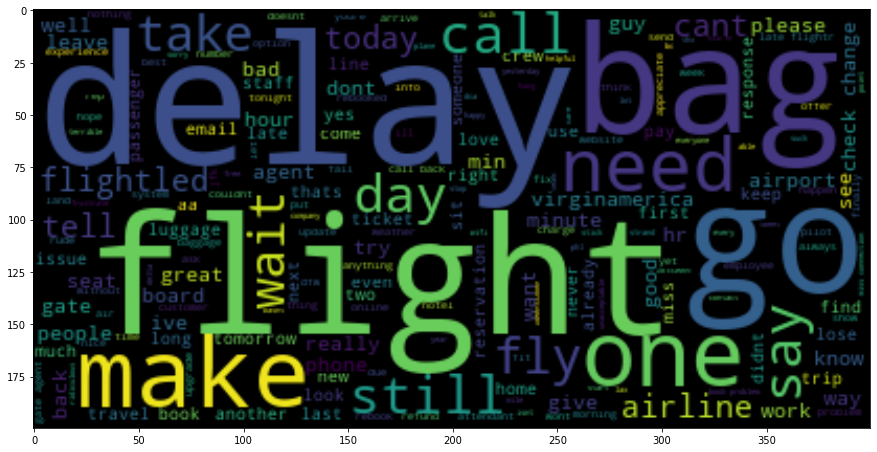

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_before, interpolation='bilinear')

In [ ]:
tweets_data.head(2)

,text,airline_sentiment,text_lower,text_wo_punct,text_wo_stop,text_wo_digits,text_wo_stopfreq,text_wo_stopfreqrare,text_stemmed,text_lemmatized
0,@VirginAmerica plus you've added commercials t...,positive,@virginamerica plus you've added commercials t...,virginamerica plus youve added commercials to ...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plus youve added commercials exp...,virginamerica plu youv ad commerci experi tacki,virginamerica plus youve added commercial expe...
1,@VirginAmerica it's really aggressive to blast...,negative,@virginamerica it's really aggressive to blast...,virginamerica its really aggressive to blast o...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica really aggressive blast obnoxiou...,virginamerica realli aggress blast obnoxi ente...,virginamerica really aggressive blast obnoxiou...


# **Other Useful Resources**
- [Allen NLP Demo](https://demo.allennlp.org/sentiment-analysis)
- [HuggingFace](https://api-inference.huggingface.co/docs/)
- [HuggingFace Colab Example Notebooks](https://github.com/huggingface/transformers/tree/master/notebooks)
- [If you want to read about transformers](https://huggingface.co/transformers/)
- [Pattern NLP link 1](https://stackabuse.com/python-for-nlp-introduction-to-the-pattern-library/)
- [Pattern NLP link 2](https://analyticsindiamag.com/hands-on-guide-to-pattern-a-python-tool-for-effective-text-processing-and-data-mining/)
- [Twitter Emotion Recognition](https://github.com/nikicc/twitter-emotion-recognition)
